DM Q1

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
# 1) Preprocess the Titanic training data
def preprocess_data(df):
    df_processed = df.copy()

    df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
    df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)
    df_processed['Fare'].fillna(df_processed['Fare'].median(), inplace=True)

    df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
    df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)

    df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df_processed['Title'] = df_processed['Title'].replace(['Lady', 'Countess','Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df_processed['Title'] = df_processed['Title'].replace('Mlle', 'Miss')
    df_processed['Title'] = df_processed['Title'].replace('Ms', 'Miss')
    df_processed['Title'] = df_processed['Title'].replace('Mme', 'Mrs')

    le = LabelEncoder()
    df_processed['Sex'] = le.fit_transform(df_processed['Sex'])
    df_processed['Embarked'] = le.fit_transform(df_processed['Embarked'])
    df_processed['Title'] = le.fit_transform(df_processed['Title'])

    features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
    return df_processed[features], df_processed['Survived'] if 'Survived' in df_processed.columns else None

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

X, y = preprocess_data(train_df)

<ipython-input-4-62a4aa53fd76>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
<ipython-input-4-62a4aa53fd76>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

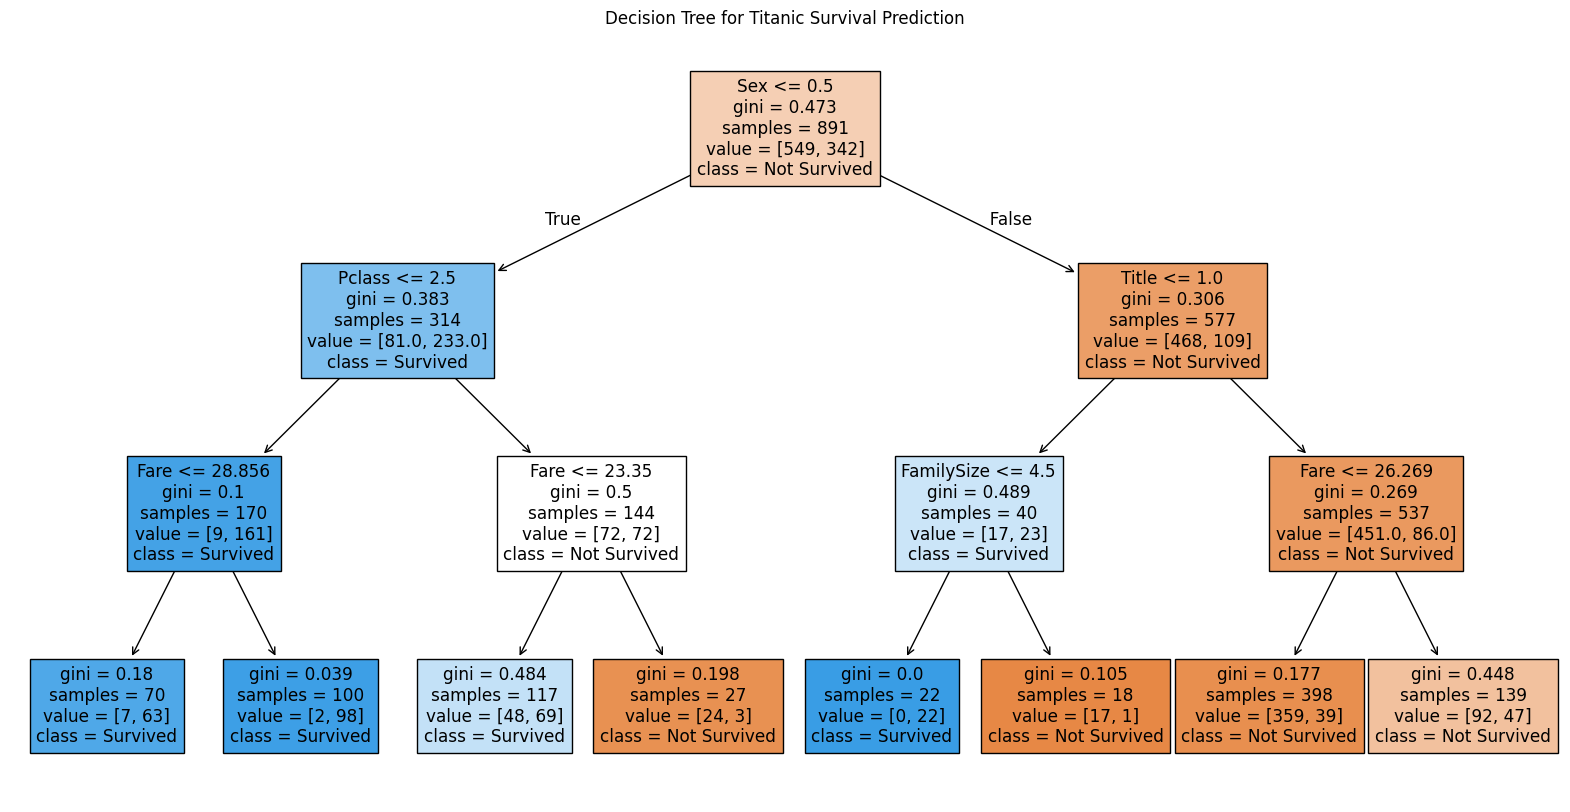

In [5]:
# 2) Learn and fine-tune Decision Tree
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
dt.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()

In [6]:
# 3) Five-fold cross validation for Decision Tree
dt_scores = cross_val_score(dt, X, y, cv=5)
dt_accuracy = np.mean(dt_scores)
print(f"Decision Tree 5-fold CV Accuracy: {dt_accuracy:.4f} (+/- {np.std(dt_scores)*2:.4f})")

# 4) Five-fold cross validation for Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10,
                           min_samples_leaf=5, random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=5)
rf_accuracy = np.mean(rf_scores)
print(f"Random Forest 5-fold CV Accuracy: {rf_accuracy:.4f} (+/- {np.std(rf_scores)*2:.4f})")


Decision Tree 5-fold CV Accuracy: 0.8126 (+/- 0.0234)
Random Forest 5-fold CV Accuracy: 0.8272 (+/- 0.0364)


In [7]:
# 5) Comparison and conclusions
print("\nAlgorithm Comparison:")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Difference (RF - DT): {rf_accuracy - dt_accuracy:.4f}")


Algorithm Comparison:
Decision Tree Accuracy: 0.8126
Random Forest Accuracy: 0.8272
Difference (RF - DT): 0.0146


In evaluating model performance for the Titanic survival prediction task, Random Forest demonstrates higher accuracy compared to a single Decision Tree, alongside lower variance in cross-validation scores, indicating greater consistency. The Decision Tree, while simpler and easier to interpret, is more susceptible to overfitting and trains faster due to its straightforward structure. In contrast, Random Forest, as an ensemble method, offers improved robustness and better generalization, though it demands more computational resources. Additionally, Random Forest excels in handling feature interactions and is less affected by feature scaling and outliers, whereas a Decision Tree may struggle in these areas. Based on the cross-validation results, Random Forest emerges as the preferable choice for this task, given its superior accuracy and generalization capabilities. However, if prioritizing model interpretability over slight performance gains, the Decision Tree remains a viable option despite its limitations.